total:
1258
df.head:
                 Date  Year  Month  Day    Weekday   Open   High    Low  \
Date                                                                      
2014-01-02 2014-01-02  2014      1    2   Thursday  41.13  41.13  40.59   
2014-01-03 2014-01-03  2014      1    3     Friday  40.67  40.76  40.27   
2014-01-06 2014-01-06  2014      1    6     Monday  40.55  40.69  40.28   
2014-01-07 2014-01-07  2014      1    7    Tuesday  40.48  40.78  40.42   
2014-01-08 2014-01-08  2014      1    8  Wednesday  40.72  40.78  40.30   

            Close     Volume  Adj Close    Return   Short_MA    Long_MA  
Date                                                                     
2014-01-02  40.69  5512000.0      31.32  0.000000  31.320000  31.320000  
2014-01-03  40.47  4198400.0      31.15 -0.005407  31.235000  31.235000  
2014-01-06  40.40  4527000.0      31.09 -0.001730  31.186667  31.186667  
2014-01-07  40.76  4705500.0      31.37  0.008911  31.232500  31.232500  
2014-01-0

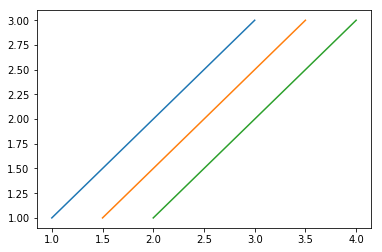

                Date     Price  Adj Close
2000-01-01 -0.171531  0.048618  -0.914513
2000-01-02  0.458807 -1.658836  -1.046490
2000-01-03  0.360905 -1.537317  -1.680322
2000-01-04 -0.584935 -1.621693  -1.896081
2000-01-05 -0.062090 -2.062350  -1.335386
                 Date      Price  Adj Close
2002-09-22 -37.223961 -38.041005  57.286836
2002-09-23 -35.818374 -36.538345  56.934389
2002-09-24 -36.286944 -36.342770  55.725235
2002-09-25 -36.245408 -36.089377  56.691199
2002-09-26 -35.003488 -37.012948  57.015159


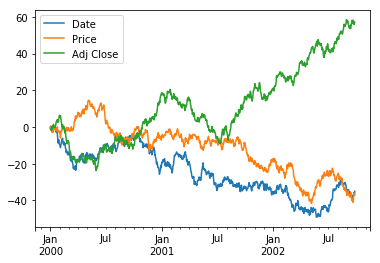

In [3]:

#****************************************************
#
# Modified by: John Stark
# MET CS 677 - February 25, 2019
# Assignment 3
#
#
#****************************************************

# run this  !pip install pandas_datareader
from pandas_datareader import data as web
import os
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year 
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.weekday_name
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()
        #        
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday', 'Open', 
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        df = df[col_list]
        return df
    except Exception as error:
        print(error)
        return None

def get_last_digit(y):
        x = str(round(float(y),2))
        x_list = x.split('.')
        fraction_str = x_list[1]
        if len(fraction_str)==1:
            return 0
        else:
            return int(fraction_str[1])


ticker='SO'
start_date='2014-01-01'
end_date='2018-12-31'
s_window = 14
l_window = 50
input_dir = r'C:\Users\jstark\bu\python\data_science_with_Python\datasets'
output_file = os.path.join(input_dir, ticker + '.csv')

df = get_stock(ticker, start_date, end_date, s_window, l_window)

total = len(df)

print ('total:')
print ( total )

print ('df.head:')
print ( df.head() )

print ('total:')
print ( total )

print ('df.head:')
print ( df.head() )

print ('Short_MA')
print (df['Short_MA'])

print ('Long_MA')
print (df['Long_MA'])

df.to_csv(output_file, index=False)
with open(output_file) as f:
   lines = f.read().splitlines()

# [Date] [High]
#x1 = df.['Date']
#y1 = df.['High']

x1 = [ 1,2,3 ]
y1 = [ 1,2,3 ]

# [Date] [Close]
x2 = [ 1.5,2.5,3.5 ]
y2 = [ 1,2,3 ]

# [Date] [Low]
x3 = [ 2,3,4 ]
y3 = [ 1,2,3 ]

#Pyplot Style
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
#plt.legend(loc='best')
plt.xlabel=('Date')
plt.ylabel=('Price')
plt.title=('Bollinger Band Plot')
plt.grid='r'
plt.show()

ts= pd.Series(np.random.randn(1000), index=pd.date_range
              ('1/1/2000', periods=1000))
df6 = pd.DataFrame(np.random.randn(1000, 3), index=ts.index,
      columns=['Date', 'Price', 'Adj Close'])
df6= df6.cumsum()
print(df6.head())
print(df6.tail())

#alias of pandas.plotting._core.FramePlotMethods
df6.plot()
